In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

/home/eclipse/anaconda3/envs/fastai/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
PATH = '../datafiles/titanic'

In [4]:
!ls {PATH}

test.csv  train.csv


In [5]:
train_df_raw = pd.read_csv(f'{PATH}/train.csv', sep=',', low_memory=False)
test_df_raw = pd.read_csv(f'{PATH}/test.csv', sep=',')

In [6]:
def shape(dataframe):
    return print('Dataset shape :\n{}'.format(dataframe.shape))

def display_transpose(dataframe):
    pd.option_context('display.max_rows' ,1000, 'display.max_columns', 1000)
    return display(dataframe.transpose())

In [7]:
train_df_raw[:20]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [8]:
#transposed view of the dataset
display_transpose(train_df_raw[:20])

shape(train_df_raw)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
PassengerId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Survived,0,1,1,1,0,0,0,0,1,1,1,1,0,0,0,1,0,1,0,1
Pclass,3,1,3,1,3,3,1,3,3,2,3,1,3,3,3,2,3,2,3,3
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry","Moran, Mr. James","McCarthy, Mr. Timothy J","Palsson, Master. Gosta Leonard","Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)","Nasser, Mrs. Nicholas (Adele Achem)","Sandstrom, Miss. Marguerite Rut","Bonnell, Miss. Elizabeth","Saundercock, Mr. William Henry","Andersson, Mr. Anders Johan","Vestrom, Miss. Hulda Amanda Adolfina","Hewlett, Mrs. (Mary D Kingcome)","Rice, Master. Eugene","Williams, Mr. Charles Eugene","Vander Planke, Mrs. Julius (Emelia Maria Vande...","Masselmani, Mrs. Fatima"
Sex,male,female,female,female,male,male,male,male,female,female,female,female,male,male,female,female,male,male,female,female
Age,22,38,26,35,35,NaN,54,2,27,14,4,58,20,39,14,55,2,NaN,31,NaN
SibSp,1,1,0,1,0,0,0,3,0,1,1,0,0,1,0,0,4,0,1,0
Parch,0,0,0,0,0,0,0,1,2,0,1,0,0,5,0,0,1,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450,330877,17463,349909,347742,237736,PP 9549,113783,A/5. 2151,347082,350406,248706,382652,244373,345763,2649
Fare,7.25,71.2833,7.925,53.1,8.05,8.4583,51.8625,21.075,11.1333,30.0708,16.7,26.55,8.05,31.275,7.8542,16,29.125,13,18,7.225


Dataset shape :
(891, 12)


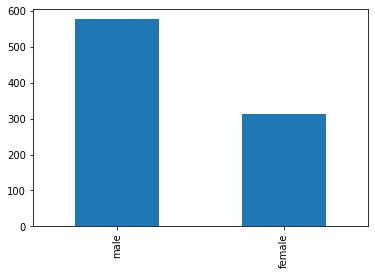

In [9]:
#The percentage of male and female passengers
display(train_df_raw.Sex.value_counts().plot.bar())

(None,)

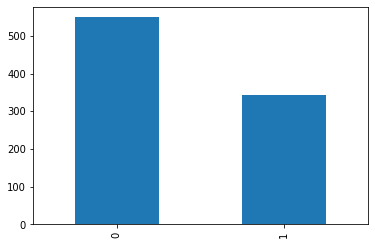

In [10]:
display(train_df_raw.Survived.value_counts().plot.bar()),

In [11]:
#changing categorical varibles into numerics
train_cats(train_df_raw)

In [12]:
display_transpose(train_df_raw.isnull().sum().sort_index()/len(train_df_raw))

Age            0.198653
Cabin          0.771044
Embarked       0.002245
Fare           0.000000
Name           0.000000
Parch          0.000000
PassengerId    0.000000
Pclass         0.000000
Sex            0.000000
SibSp          0.000000
Survived       0.000000
Ticket         0.000000
dtype: float64

In [37]:
train_df, train_y, _ = proc_df(train_df_raw, 'Survived')
train_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,1,3,109,2,22.0,1,0,524,7.2500,0,3,False
1,2,1,191,1,38.0,1,0,597,71.2833,82,1,False
2,3,3,354,1,26.0,0,0,670,7.9250,0,3,False
3,4,1,273,1,35.0,1,0,50,53.1000,56,3,False
4,5,3,16,2,35.0,0,0,473,8.0500,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,549,2,27.0,0,0,102,13.0000,0,3,False
887,888,1,304,1,19.0,0,0,15,30.0000,31,3,False
888,889,3,414,1,28.0,1,2,676,23.4500,0,3,True
889,890,1,82,2,26.0,0,0,9,30.0000,61,1,False


In [18]:
model = RandomForestClassifier(n_jobs=-1).fit(train_df, train_y)
print('Training score : \n{}'.format(model.score(train_df, train_y)))

Training score : 
1.0


In [19]:
model = RandomForestClassifier(n_estimators=100, n_jobs=8, max_features=0.5, min_samples_leaf=1).fit(train_df, train_y)
print('Training score : \n{}'.format(model.score(train_df, train_y)))

Training score : 
1.0


In [20]:
display_transpose(test_df_raw)
test_df_raw

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Name,"Kelly, Mr. James","Wilkes, Mrs. James (Ellen Needs)","Myles, Mr. Thomas Francis","Wirz, Mr. Albert","Hirvonen, Mrs. Alexander (Helga E Lindqvist)","Svensson, Mr. Johan Cervin","Connolly, Miss. Kate","Caldwell, Mr. Albert Francis","Abrahim, Mrs. Joseph (Sophie Halaut Easu)","Davies, Mr. John Samuel",...,"Riordan, Miss. Johanna Hannah""""","Peacock, Miss. Treasteall","Naughton, Miss. Hannah","Minahan, Mrs. William Edward (Lillian E Thorpe)","Henriksson, Miss. Jenny Lovisa","Spector, Mr. Woolf","Oliva y Ocana, Dona. Fermina","Saether, Mr. Simon Sivertsen","Ware, Mr. Frederick","Peter, Master. Michael J"
Sex,male,female,male,male,female,male,female,male,female,male,...,female,female,female,female,female,male,female,male,male,male
Age,34.5,47,62,27,22,14,30,26,18,21,...,NaN,3,NaN,37,28,NaN,39,38.5,NaN,NaN
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Ticket,330911,363272,240276,315154,3101298,7538,330972,248738,2657,A/4 48871,...,334915,SOTON/O.Q. 3101315,365237,19928,347086,A.5. 3236,PC 17758,SOTON/O.Q. 3101262,359309,2668
Fare,7.8292,7,9.6875,8.6625,12.2875,9.225,7.6292,29,7.2292,24.15,...,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,C78,NaN,NaN,C105,NaN,NaN,NaN


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [21]:
train_cats(test_df_raw)

In [25]:
test_x, test_y, _ = proc_df(test_df_raw, None, na_dict=None)
display_transpose(test_x)

,0,1,2,3,4,5,6,7,8,9,...,408,409,410,411,412,413,414,415,416,417
PassengerId,892,893,894,895,896,897,898,899,900,901,...,1300,1301,1302,1303,1304,1305,1306,1307,1308,1309
Pclass,3,3,2,3,3,3,3,2,3,3,...,3,3,3,1,3,3,1,3,3,3
Name,207,404,270,409,179,367,85,58,5,104,...,317,297,274,263,173,354,284,333,385,303
Sex,2,1,2,2,1,2,1,2,1,2,...,1,1,1,1,1,2,1,2,2,2
Age,34.5,47,62,27,22,14,30,26,18,21,...,27,3,27,37,28,27,39,38.5,27,27
SibSp,0,1,0,0,1,0,0,1,0,2,...,0,1,0,1,0,0,0,0,0,1
Parch,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
Ticket,153,222,74,148,139,262,159,85,101,270,...,161,352,229,49,185,268,325,347,221,106
Fare,7.8292,7,9.6875,8.6625,12.2875,9.225,7.6292,29,7.2292,24.15,...,7.7208,13.775,7.75,90,7.775,8.05,108.9,7.25,8.05,22.3583
Cabin,0,0,0,0,0,0,0,0,0,0,...,0,0,0,42,0,0,23,0,0,0


In [47]:
drop_this = ['Fare_na']
test_X = test_x.drop(drop_this, axis=1)
test_X

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_na
0,892,3,207,2,34.5,0,0,153,7.8292,0,2,False
1,893,3,404,1,47.0,1,0,222,7.0000,0,3,False
2,894,2,270,2,62.0,0,0,74,9.6875,0,2,False
3,895,3,409,2,27.0,0,0,148,8.6625,0,3,False
4,896,3,179,1,22.0,1,1,139,12.2875,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,354,2,27.0,0,0,268,8.0500,0,3,True
414,1306,1,284,1,39.0,0,0,325,108.9000,23,1,False
415,1307,3,333,2,38.5,0,0,347,7.2500,0,3,False
416,1308,3,385,2,27.0,0,0,221,8.0500,0,3,True


In [53]:
model = RandomForestClassifier(n_estimators=100, n_jobs=8, max_features=0.5, min_samples_leaf=1).fit(train_df, train_y)
prediction = model.predict(test_X)

In [54]:
#Predictions
output = pd.DataFrame({'PassengerId': test_df_raw.PassengerId, 'Survived': prediction})
output.to_csv('my_submission.csv', index=False)